数字图像与视频处理研究生课程

2019春季学期期末考试

姓名:胡欣毅  学号:180776

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [2]:
def rotate(image, angle, center=None, scale=1.0):
    # angle 负是顺时针旋转
    (h, w) = image.shape[:2]
    if center is None:
        center = (w // 2, h // 2) 
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

在D盘根目录下有一彩色图像文件abc.jpg。 图像的长宽分别为201、77。 现 在 请 用Python编 程,读 取 整 个 图 像 位 于 正 中 间 位 置 的 像 素值。

-----像素(39,101)

(-0.5, 200.5, 76.5, -0.5)

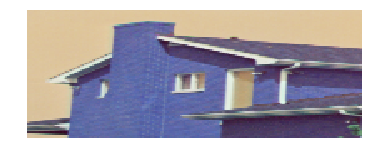

In [3]:
im = cv2.imread('abc.jpg')
im = cv2.resize(im, (201,77), cv2.INTER_CUBIC)
plt.imshow(im,cmap='gray')
plt.axis("off")

In [4]:
m,n = im.shape[:-1]
#　对应点的像素
im[m//2,n//2,:]

array([149, 146, 139], dtype=uint8)

若图像清晰度不高但没有噪声,可以用3 × 3的模板实现Laplace增强算法,请写出算法的基本公式,并写出Python 代码。 

特别约定:除读写图像外不得调用其他相关的函数。

二维边缘增强 
$$ u_t(x,y) = u(x,y) - \lambda \Delta u(x,y)  $$

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [6]:
def my_filter2D( img , kel ):
    m,n = kel.shape
    # out 是输出
    out = np.zeros(img.shape)
    # mat 是补完 0 的
    mat = np.zeros( (img.shape[0]+m-1, img.shape[1]+n-1) )
    # 扩充
    #mat = np.pad(img, ((m-1,0),(n-1,0)),'constant')
    mat[(m-1):,(n-1):] = img
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            out[i,j] = np.multiply(mat[i:i+m,j:j+n] , kel ).sum()    
    return out

# 测试 2 维卷积
my_filter2D(np.ones((3,3)),np.ones((2,2)) )

array([[1., 2., 2.],
       [2., 4., 4.],
       [2., 4., 4.]])

没噪声

(-0.5, 200.5, 76.5, -0.5)

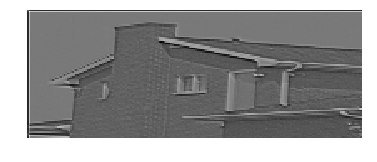

In [7]:
Laplace = np.array([[1, 1, 1],
                    [1,-8, 1],
                    [1, 1, 1]])
gray = rgb2gray(im)
deta_f = my_filter2D(gray,Laplace)
labd = .5
re_build = gray - (labd * deta_f).astype(int)
plt.imshow(re_build,cmap='gray')
plt.axis("off")

有噪声

In [8]:
def gaussian_2d_kernel(kernel_size = 3,sigma = 1.):
    kernel = np.zeros((kernel_size,kernel_size))
    center = kernel_size//2

    sum_val = 0
    for i in range(0,kernel_size):
        for j in range(0,kernel_size):
            x = i-center
            y = j-center
            kernel[i,j] = np.exp(-(x**2+y**2) /(2*(sigma**2)))
            sum_val += kernel[i,j]
    return kernel/sum_val

# test gauss kernel
gass = gaussian_2d_kernel(kernel_size=3,sigma = 2.0)
gass

array([[0.10186806, 0.11543164, 0.10186806],
       [0.11543164, 0.13080118, 0.11543164],
       [0.10186806, 0.11543164, 0.10186806]])

(-0.5, 200.5, 76.5, -0.5)

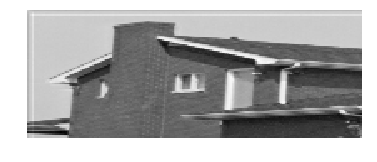

In [9]:
deta_f = my_filter2D(gray,Laplace)

gass = gaussian_2d_kernel(kernel_size = 3,sigma = 2.0)
deta_f = my_filter2D(deta_f,gass)
labd = .1
re_build = gray - (labd * deta_f).astype(int)
plt.imshow(re_build,cmap='gray')
plt.axis("off")

对任意一个灰度图像,请写出其灰度直方图的计算公式。
$$
h = \frac{i_k}{M \times N}
$$

其中$i_k$是$k$级像素的个数(k = 0,1,...,255)

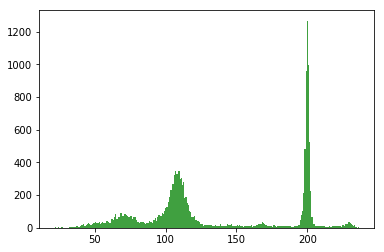

In [10]:
arr=gray.flatten()
n, bins, patches = plt.hist(arr, bins=256, facecolor='green', alpha=0.75)  
plt.show()

对图像f (x, y)可以采用Gabor的方向滤波。 请草绘出以下方向滤波函数的等高线示意图。

$$
h_{1}(x, y)=e^{-\frac{x^{2}}{9}-\frac{y^{2}}{4}}
$$

直接
$$
\begin{bmatrix} x' \\ y' \end{bmatrix} = 
\begin{bmatrix}
 \cos \theta & \sin \theta  \\ 
-\sin \theta  & \cos \theta 
\end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix}
$$

$$
filter = exp \left[ -\frac{(\cos \theta x + \sin \theta y)^{2}}{9}-\frac{(-\sin \theta x + \cos \theta y)^{2}}{4}\right]
$$

In [11]:
X = np.arange(-10, 10, 0.2)
Y = np.arange(-10, 10, 0.2)
X, Y = np.meshgrid(X, Y)
X_len,Y_len = len(X)//2 ,len(Y)//2

$$
\lambda = \frac{1}{1/p - 1/q }\tan 2 \theta 
$$

$$
g(x,y) = exp \left[-\lambda * x * y \right]
$$

$$
filter = h\times g = exp \left[-\frac{x^{2}}{p}-\frac{y^{2}}{q}\right] exp \left[-\lambda \times x \times y \right]
$$

-0.240562612162344


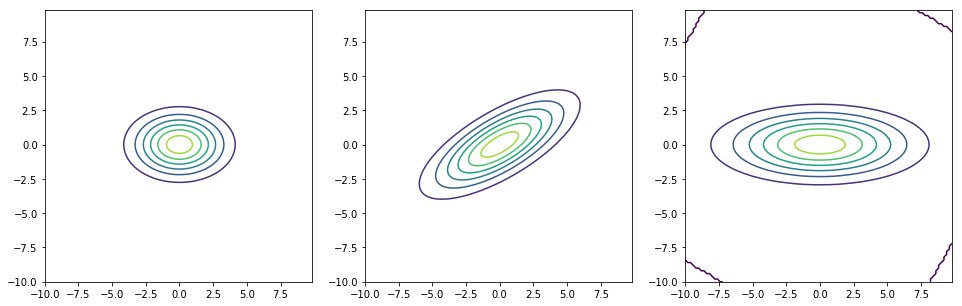

In [12]:
rho = 0
p,q = 9.,4.

Z = np.exp(-X**2/p -Y**2/q)

plt.figure(figsize=(22,5))
# src
plt.subplot(142)
plt.contour(X,Y,Z)
#plt.axis('off')

# fft
'''z = np.fft.fft2(Z)
z = np.fft.fftshift(z)
plt.subplot(141)
plt.imshow(np.abs(z).astype(int)[X_len-15:X_len+15,\
    Y_len-15:Y_len+15],cmap="gray",origin='lower')
plt.axis('off')'''

# 旋转
theta = 30
lambd = (1/p - 1/q) * np.tan(2*theta*np.pi/180)
print(lambd)
Zz = np.exp(-X**2/p -Y**2/q)*np.exp(-lambd*X*Y)

plt.subplot(143)
plt.contour(X,Y,Zz)

# theta 负是顺时针旋转(imshow坐标系)
# theta 负是逆时针旋转(contour坐标系)
plt.subplot(144)
plt.contour(X,Y, rotate(Zz, theta ,scale = 1.2)  )
#plt.axis('off')

plt.show()

$$
h_{90}(x, y)=e^{-\frac{x^{2}}{4}-\frac{y^{2}}{9}}
$$

0.240562612162344


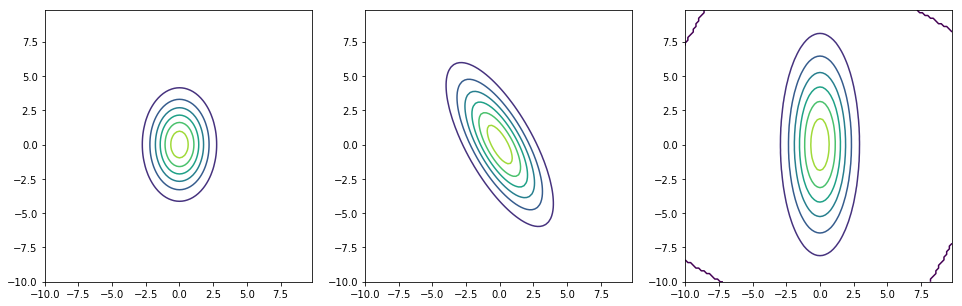

In [13]:
rho = 0
p,q = 4.,9.

Z = np.exp(-X**2/p -Y**2/q)

plt.figure(figsize=(22,5))
# src
plt.subplot(142)
plt.contour(X,Y,Z)
#plt.axis('off')

# fft
'''z = np.fft.fft2(Z)
z = np.fft.fftshift(z)
plt.subplot(141)
plt.imshow(np.abs(z).astype(int)[X_len-15:X_len+15,\
    Y_len-15:Y_len+15],cmap="gray",origin='lower')
plt.axis('off')'''

# 旋转
theta = 30
lambd = (1/p - 1/q) * np.tan(2*theta*np.pi/180)
print(lambd)
Zz = np.exp(-X**2/p -Y**2/q)*np.exp(-lambd*X*Y)

plt.subplot(143)
plt.contour(X,Y,Zz)

# theta 负是顺时针旋转(imshow坐标系)
# theta 负是逆时针旋转(contour坐标系)
plt.subplot(144)
plt.contour(X,Y, rotate(Zz, theta ,scale = 1.2)  )
#plt.axis('off')

plt.show()

请写出Gabor第一算法与第二算法的计算公式。 这两个算法的适用场景。并请指出工程实践上如何处理其中的方向导数运算。

* 第一算法(法向增强)
$$
f_t(x,y) = f(x,y) - t \frac{\partial^2 f }{\partial n^2}  
$$
* 第二算法(法向增强[-],切向平滑[+])
$$
f_t(x,y) = f(x,y) - t(\frac{\partial^2 f }{\partial n^2} - \frac{1}{3}\frac{\partial^2 f }{\partial s^2} )
$$

对于图像, ***$n$的方向只取4个: $0,\pi/4,\pi/2,3\pi/4$***

适用的场景:含噪声的图像增强